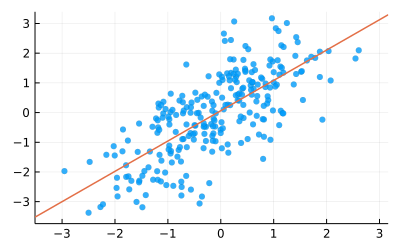

In [1]:
using Plots
default(fmt = :png, size = (400, 250), titlefontsize = 10, plot_titlefontsize = 12)

function plot_ols(x, y;
        ms=4, lw=1.5, alpha=0.8, xguide="", yguide="",
        xlim=nothing, ylim=nothing, kwargs...)
    X = x .^ (0:1)'
    α̂, β̂ = X \ y
    
    if isnothing(xlim)
        a, b = extrema(x)
        xlim = (a - 0.1(b-a), b + 0.1(b-a))
    end
    if isnothing(ylim)
        c, d = extrema(y)
        ylim = (a - 0.1(d-c), b + 0.1(d-c))
    end
    
    scatter(x, y; label="", msw=0, ms, alpha)
    plot!(x -> α̂ + β̂*x, xlim...; label="", lw)
    plot!(; xguide, yguide, xlim, ylim)
    plot!(; kwargs...)
end

n = 2^8
x, y = randn(n), randn(n)
x, y = x, x+y
plot_ols(x, y)

https://en.wikipedia.org/wiki/Anscombe%27s_quartet

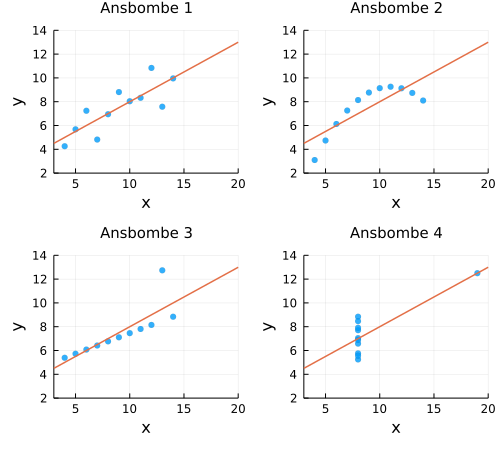

In [2]:
using RDatasets
anscombe = dataset("datasets", "anscombe")
xlim, ylim = (3, 20), (2, 14)
xguide, yguide = "x", "y"
PP = []
for i in 1:4
    x, y = anscombe[!, "X$i"], anscombe[!, "Y$i"]
    P = plot_ols(x, y; xguide, yguide, xlim, ylim, title="Ansbombe $i")
    push!(PP, P)
end
Anscombe_quartet = plot(PP...; size=(500, 450))

https://www.autodesk.com/research/publications/same-stats-different-graphs

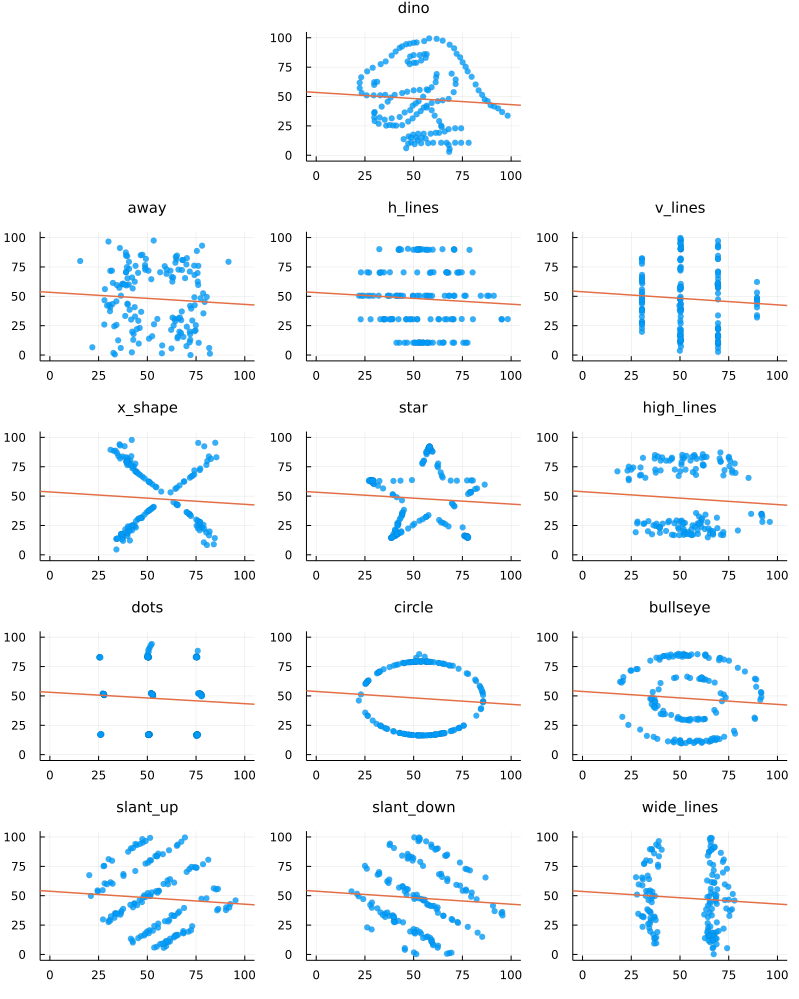

In [3]:
# Rの側にdatasauRusパッケージをインストールしておくこと

using RCall
datasaurus = rcopy(R"datasauRus::datasaurus_dozen")
datanames = unique(datasaurus.dataset)
xlim = ylim = (-5, 105)
xguide = yguide = ""
PP = []
for name in datanames
    x = datasaurus.x[datasaurus.dataset .== name]
    y = datasaurus.y[datasaurus.dataset .== name]
    P = plot_ols(x, y; xlim, ylim, title=name)
    push!(PP, P)
end
layout = @layout[_ a _; b c d; e f g; h i j; k l m]
Datasaurus_dozen = plot(PP...; layout, size=(800, 1000))